# Implementation Details

1.	The creation of the eight emotion sets of Plutchik's Wheel.
2.	The importing of tweets to be analyzed.
3.	The application of sentiment analysis on the tweets, followed by the organization of the results in a data frame.

## *The creation of the eight emotion sets of Plutchik's Wheel*

*Using an English-English dictionary containing numerous words with their explanations, the eight emotion sets of Plutchik's Wheel were generated. The primary emotions of Plutchik's Wheel are joy, trust, fear, surprise, sadness, disgust, anger, and anticipation.*

*Initially, dictionaries were formed for each emotion, where the words were utilized as 'keys' and their corresponding numbers as 'values'. The words found within the explanation of each emotion were included in their respective dictionaries, along with their associated numbers. Following that, the dictionaries were expanded by adding the words found within the explanations of each 'key'. The repetition of this process was controllable by the depth of the implemented function. In the event of encountering duplicate words, the 'value' was incremented based on their numbers.*

*Finally, the dictionaries for each emotion were saved as separate JSON files for future usage.*

In [1]:
# Import the modules required
import pandas as pd
import json
import operator
import requests
import regex as re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from string import digits
pd.options.display.max_colwidth = 280
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dictionary that will be used  to create the sets
data = json.load(open(r"thesaurus.json"))

In [3]:
# Set a function taking out related words for a given word and putting them all into a dictionary

def find_related(input_string: str, dictionary: dict, depth: int = 1):
    if input_string not in dictionary:
        return
# I used 'source and target' since we can't make changes in the dictionary in Python while traversing over it
    source = {input_string: 1}
    target = {}

    for i in range(depth):
        for word1 in source:
            if word1 not in dictionary:
                continue

            # Find the related words
            description = dictionary[word1]
        
            for word in description:

                # Build dictionary from list
                if word not in target:
                    target[word] = 1
                else:
                    target[word] += 1

        source.clear()
        source = target.copy()

    return target

In [4]:
# Set a function sorting the emotion dictionaries in descending order, and adjusting their lengths to make them equivalent

def limit_of_set (emotion, depth, limit):
    
    set = find_related(emotion, data, depth)
    print('The length of', emotion, 'dictionary: ', len(set))
    
    # Sort the dictionary in a descending order based on its values.
    order_set = dict( sorted(set.items(), key=operator.itemgetter(1), reverse=True))
    
    # Trim the dictionary at a specific point
    emotion_set = {}
    for key, value in order_set.items():
        if len(emotion_set) > limit:
            break
        emotion_set[key] = value
    print('The length of', emotion, 'dictionary after cutting: ', len(emotion_set))
    
    # Equalize the dictionary values after cutting
    emotion_set = dict.fromkeys(emotion_set, 1)
        
    return emotion_set

***Call the function for all emotions***

In [5]:
joy = limit_of_set('joy', 3, 100)
# Store the dictionary in a json file
with open('sets\\joy.json', 'w') as fp:
    json.dump(joy, fp)

trust = limit_of_set('trust', 3, 100)
with open('sets\\trust.json', 'w') as fp:
    json.dump(trust, fp)

fear = limit_of_set('fear', 4, 100)
with open('sets\\fear.json', 'w') as fp:
    json.dump(fear, fp)

surprise = limit_of_set('surprise', 4, 100)
with open('sets\\surprise.json', 'w') as fp:
    json.dump(surprise, fp)

sadness = limit_of_set('sadness', 3, 100)
with open('sets\\sadness.json', 'w') as fp:
    json.dump(sadness, fp)

disgust = limit_of_set('disgust', 4, 100)
with open('sets\\disgust.json', 'w') as fp:
    json.dump(disgust, fp)

anger = limit_of_set('anger', 3, 100)
with open('sets\\anger.json', 'w') as fp:
    json.dump(anger, fp)

anticipation = limit_of_set('anticipation', 4, 100)
with open('sets\\anticipation.json', 'w') as fp:
    json.dump(anticipation, fp)

The length of joy dictionary:  129
The length of joy dictionary after cutting:  101
The length of trust dictionary:  253
The length of trust dictionary after cutting:  101
The length of fear dictionary:  157
The length of fear dictionary after cutting:  101
The length of surprise dictionary:  164
The length of surprise dictionary after cutting:  101
The length of sadness dictionary:  127
The length of sadness dictionary after cutting:  101
The length of disgust dictionary:  206
The length of disgust dictionary after cutting:  101
The length of anger dictionary:  169
The length of anger dictionary after cutting:  101
The length of anticipation dictionary:  101
The length of anticipation dictionary after cutting:  101


In [6]:
# Print some keys of Joy dictionary.
dict(list(joy.items())[:10])

{'transport': 1,
 'ecstasy': 1,
 'rapture': 1,
 'delight': 1,
 'enjoyment': 1,
 'joy': 1,
 'pleasure': 1,
 'happiness': 1,
 'bliss': 1,
 'gladness': 1}

## *The application of sentiment analysis*

***Set a class applying Sentiment Analysis to Tweets by detecting intersections between each Tweet and emotion dictionaries***

In [7]:
class Feeling:
    # Import the dictionaries into the class.
    joy_dic = json.load(open(f"sets\\joy.json"))
    trust_dic = json.load(open(f"sets\\trust.json"))
    fear_dic = json.load(open(f"sets\\fear.json"))
    surprise_dic = json.load(open(f"sets\\surprise.json"))
    sadness_dic = json.load(open(f"sets\\sadness.json"))
    disgust_dic = json.load(open(f"sets\\disgust.json"))
    anger_dic = json.load(open(f"sets\\anger.json"))
    anticipation_dic = json.load(open(f"sets\\anticipation.json"))
    
    def __init__(self, tweet):
        # Assign an initial value to each emotion in each tweet.
        self.joy = 0
        self.trust = 0
        self.fear = 0
        self.surprise = 0
        self.sadness = 0
        self.disgust = 0
        self.anger = 0
        self.anticipation = 0
        self.tot = 0

        self.words = []
        self.split(tweet)
        self.find_frequency()

    def split(self, tweet):
        # Clean the tweets
        res = ''.join([i for i in tweet if not i.isdigit()])
        self.words = re.sub(r'[^\w\s]', '', res.lower()).split()
        for word in self.words:
            if word in stopwords.words('english'):
                self.words.remove(word)
                continue

    def find_frequency(self):
        # Compute the intersections between every tweet and each set of emotion sets.
        for word in self.words:
            self.joy += Feeling.joy_dic.get(word, 0)
            self.trust += Feeling.trust_dic.get(word, 0)
            self.fear += Feeling.fear_dic.get(word, 0)
            self.surprise += Feeling.surprise_dic.get(word, 0)
            self.sadness += Feeling.sadness_dic.get(word, 0)
            self.disgust += Feeling.disgust_dic.get(word, 0)
            self.anger += Feeling.anger_dic.get(word, 0)
            self.anticipation += Feeling.anticipation_dic.get(word, 0)
            
            # Normalize the outcomes
            self.tot = self.joy+self.trust+self.fear+self.surprise+self.sadness+self.disgust+self.anger+self.anticipation
        try:
            self.joy /= self.tot
            self.trust /= self.tot
            self.fear /= self.tot
            self.surprise /= self.tot
            self.sadness /= self.tot
            self.disgust /= self.tot
            self.anger /= self.tot
            self.anticipation /= self.tot
        except:
            pass

## *The importing of tweets to be analyzed*

***Now, import 30000 Tweets related to World Cup 2022 Using Snscrape Libray***

In [8]:
import snscrape.modules.twitter as sntwitter

# Creating list to append tweet data to
tweets_list = []

query = 'world cup 2022 lang:en since:2022-11-20 until:2022-12-20'
limit = 30000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i > limit:
        break
    tweets_list.append([tweet.username, tweet.date, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(tweets_list, columns=["User", "Date", "Tweet"])
tweets_df.to_csv('world_cup.csv')

Unavailable user in card on tweet 1604971095655841798
Unavailable user in card on tweet 1604971095655841798
User 26734856 not found in user refs in card on tweet 1604971095655841798
User 26734856 not found in user refs in card on tweet 1604971095655841798
Unavailable user in card on tweet 1604940393753284608
User 1041604336160137216 not found in user refs in card on tweet 1604940393753284608
Unavailable user in card on tweet 1604928056162152448
Unavailable user in card on tweet 1604928056162152448
User 363577315 not found in user refs in card on tweet 1604928056162152448
User 363577315 not found in user refs in card on tweet 1604928056162152448
Unavailable user in card on tweet 1604923780152692736
User 1041604336160137216 not found in user refs in card on tweet 1604923780152692736
Unavailable user in card on tweet 1604910190528266250
User 1041604336160137216 not found in user refs in card on tweet 1604910190528266250
Unavailable user in card on tweet 1604884301941727237
User 8388246242

User 2226005232 not found in user refs in card on tweet 1604653725917888512
Unavailable user in card on tweet 1604633909769433088
Unavailable user in card on tweet 1604633909769433088
User 1630083736837521409 not found in user refs in card on tweet 1604633909769433088
User 1630083736837521409 not found in user refs in card on tweet 1604633909769433088
Unavailable user in card on tweet 1604619527349829632
User 1041604336160137216 not found in user refs in card on tweet 1604619527349829632
Unavailable user in card on tweet 1604608955203952640
User 1041604336160137216 not found in user refs in card on tweet 1604608955203952640
Unavailable user in card on tweet 1604601660533268481
User 1041604336160137216 not found in user refs in card on tweet 1604601660533268481
Unavailable user in card on tweet 1604599893636661249
User 26734856 not found in user refs in card on tweet 1604599893636661249
Unavailable user in card on tweet 1604598387625627648
User 1041604336160137216 not found in user refs

In [51]:
tweets_df

,User,Date,Tweet
0,MessiGoatesque,2022-12-19 23:59:53+00:00,"MessiStats_: 03.12.2022\nWorld Cup Round of 16\nArgentina vs Australia 2-1\n\nMessi marked his 1,000th senior career game with his first goal in the knockout stage of a World Cup in a victory over Australia.\n\nIt was also Messi's 100th game as a starting capt… https://t.co/h..."
1,MessiGoatesque,2022-12-19 23:59:52+00:00,"MessiStats_: 30.11.2022\nWorld Cup group stage\nPoland vs Argentina 0-2\n\nMessi missed a penalty on his record-breaking 22nd World Cup match, one more than the late Diego Maradona managed for La Albiceleste.\n\nIt is the only match of the 2022 World Cup witho… https://t.co/I..."
2,MessiGoatesque,2022-12-19 23:59:51+00:00,"MessiStats_: Against Mexico, Messi lifted his goal tally for Argentina in 2022 to 13, more than in any other calendar year. His previous record was 12 goals from 2021.\n\nHe also registered his first assist of the 2022 World Cup by setting up Enzo Fernande… https://t.co/YC8Xx..."
3,MessiGoatesque,2022-12-19 23:59:50+00:00,"MessiStats_: 26.11.2022\nWorld Cup, group stage\nArgentina vs Mexico 2-0\n\nMessi produced a moment of trademark magic to help keep Argentina's World Cup hopes alive in a much needed victory.\n\nIt was an eighth World Cup goal for Messi, who played his 21st Wo… https://t.co/u..."
4,MessiGoatesque,2022-12-19 23:59:49+00:00,"MessiStats_: 26.11.2022\nWorld Cup, group stage\nArgentina vs Mexico 2-0\n\nMessi produced a moment of trademark magic to help keep Argentina's World Cup hopes alive in a much needed victory.\n\nIt was an eighth World Cup goal for Messi, who played his 21st Wo… https://t.co/L..."
...,...,...,...
29996,Betway_za,2022-12-18 17:58:46+00:00,"🇦🇷Argentina will now add a 3rd star to their badge after claiming their 3rd #FIFAWorldCup trophy⭐️⭐️⭐️\n\n1978✅\n1986✅\n2022✅\n\n🏆🔥 Messi is finally a ""World Cup winner"" 🔥🏆 https://t.co/Bfq358fMKe"
29997,hafizshamsul27,2022-12-18 17:58:46+00:00,🇦🇷🇨🇵 FIFA WORLD CUP FINAL 2022
29998,SamanandaSingh3,2022-12-18 17:58:45+00:00,2022 Football World Cup final \nWhat a Nice match !! Messi you are my inspiration GOLDEN MOMENT for Argentina Love from India
29999,UFCLive94,2022-12-18 17:58:45+00:00,(LIVE) Streaming Argentina vs France FIFA World Cup Final 2022\n Live\nArgentina vs France\nArgentina vs France Live\n👇 👇\n🔴𝕃𝕀𝕍𝔼 𝐋𝐢𝐧𝐤🔴 https://t.co/buXjz0hcWJ\n\n🔴𝕃𝕀𝕍𝔼 𝐋𝐢𝐧𝐤🔴 https://t.co/buXjz0hcWJ\n\nsdfrh


### *Run the class and arrange the results in a DataFrame.*

In [10]:
# Create empty DataFrame with column names
df = pd.DataFrame(columns = ['Tweet', 'Joy', 'Trust', 'Fear', 'Surprise',
                             'Sadness', 'Disgust', 'Anger', 'Anticipation'])

# Fill the DataFrame with the result of each tweet row by row
for twt in tweets_df['Tweet']:
    tweet = Feeling(twt)
    df.loc[len(df)] = [twt, tweet.joy, tweet.trust, tweet.fear, tweet.surprise,
                       tweet.sadness, tweet.disgust, tweet.anger, tweet.anticipation]

# Normalize the outcomes
df = df.set_index('Tweet')
df = df.div(df.sum(axis=1), axis=0)

# Add a row containing the mean of each emotion for all Tweets
df.loc['mean'] = df.mean()
df

,Joy,Trust,Fear,Surprise,Sadness,Disgust,Anger,Anticipation
Tweet,,,,,,,,
"MessiStats_: 03.12.2022\nWorld Cup Round of 16\nArgentina vs Australia 2-1\n\nMessi marked his 1,000th senior career game with his first goal in the knockout stage of a World Cup in a victory over Australia.\n\nIt was also Messi's 100th game as a starting capt… https://t.co/hshCBva5Y5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"MessiStats_: 30.11.2022\nWorld Cup group stage\nPoland vs Argentina 0-2\n\nMessi missed a penalty on his record-breaking 22nd World Cup match, one more than the late Diego Maradona managed for La Albiceleste.\n\nIt is the only match of the 2022 World Cup witho… https://t.co/IDiVKdFS5A",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"MessiStats_: Against Mexico, Messi lifted his goal tally for Argentina in 2022 to 13, more than in any other calendar year. His previous record was 12 goals from 2021.\n\nHe also registered his first assist of the 2022 World Cup by setting up Enzo Fernande… https://t.co/YC8XxX3Uzi",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"MessiStats_: 26.11.2022\nWorld Cup, group stage\nArgentina vs Mexico 2-0\n\nMessi produced a moment of trademark magic to help keep Argentina's World Cup hopes alive in a much needed victory.\n\nIt was an eighth World Cup goal for Messi, who played his 21st Wo… https://t.co/uHYeIVp4oe",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"MessiStats_: 26.11.2022\nWorld Cup, group stage\nArgentina vs Mexico 2-0\n\nMessi produced a moment of trademark magic to help keep Argentina's World Cup hopes alive in a much needed victory.\n\nIt was an eighth World Cup goal for Messi, who played his 21st Wo… https://t.co/LUAE0smwAN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
🇦🇷🇨🇵 FIFA WORLD CUP FINAL 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022 Football World Cup final \nWhat a Nice match !! Messi you are my inspiration GOLDEN MOMENT for Argentina Love from India,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
(LIVE) Streaming Argentina vs France FIFA World Cup Final 2022\n Live\nArgentina vs France\nArgentina vs France Live\n👇 👇\n🔴𝕃𝕀𝕍𝔼 𝐋𝐢𝐧𝐤🔴 https://t.co/buXjz0hcWJ\n\n🔴𝕃𝕀𝕍𝔼 𝐋𝐢𝐧𝐤🔴 https://t.co/buXjz0hcWJ\n\nsdfrh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'The emotional distribution surrounding the World Cup 2022 based on 30000 tweets'}>

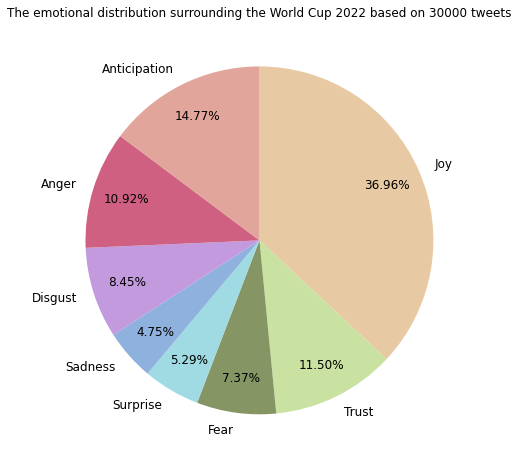

In [27]:
# Visualize the results in a pie chart
colors = ['#E7CAA3','#C9E1A1','#869564','#A0DAE2','#8FB1DD','#C39ADD','#CF6081','#E2A59B']
df.iloc[len(df)-1].plot.pie(figsize=(8, 8),colors=colors, fontsize=12, autopct='%1.2f%%',
                                 startangle=90, counterclock=False, pctdistance=0.8, label="",
                                 title = 'The emotional distribution surrounding the World Cup 2022 based on 30000 tweets')

### *Let's test the model on another topic, COVID-19 pandemic for example*

In [37]:
tweets_list1 = []

query = 'covid lang:en since:2019-11-17 until:2020-02-17'
limit = 30000

for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i > limit:
        break
    tweets_list1.append([tweet.username, tweet.date, tweet.content])
    
tweets_df1 = pd.DataFrame(tweets_list1, columns=["User", "Date", "Tweet"])
tweets_df1.to_csv('covid.csv')

Unavailable user in card on tweet 1229189826345345025
User 218852667 not found in user refs in card on tweet 1229189826345345025
Unavailable user in card on tweet 1229049768195829760
Unavailable user in card on tweet 1229049768195829760
User 15843059 not found in user refs in card on tweet 1229049768195829760
User 15843059 not found in user refs in card on tweet 1229049768195829760
Unavailable user in card on tweet 1228895048525402112
Unavailable user in card on tweet 1228895048525402112
User 1630083736837521409 not found in user refs in card on tweet 1228895048525402112
User 1630083736837521409 not found in user refs in card on tweet 1228895048525402112
Unavailable user in card on tweet 1228872639806087168
User 218852667 not found in user refs in card on tweet 1228872639806087168
Unavailable user in card on tweet 1228707310387826691
Unavailable user in card on tweet 1228707310387826691
User 1637252214 not found in user refs in card on tweet 1228707310387826691
User 1637252214 not foun

In [52]:
tweets_df1

,User,Date,Tweet
0,reinterpreterdj,2020-02-16 23:59:42+00:00,Coronavirus (COVID-19): latest information and advice @GOVUK https://t.co/TfhL2Ut4EA
1,nopittie,2020-02-16 23:59:40+00:00,"@howroute I am not buying it. Besides, how many of the people lapping up the conspiracy theories about COVID-19 refuse to get the flu shot knowing it kills more than this? If a vaccination was made for COVID-19, would they get it? Doubtful 😒"
2,SuperCycleBear,2020-02-16 23:59:36+00:00,@ChrisWeston_PS WTF? Before any impact of covid 19? Hard to think this is business as usual anytime soon
3,PubTrend,2020-02-16 23:59:31+00:00,Trending on PubMed: Case of the Index Patient Who Caused Tertiary Transmission of COVID-19 Infection in Korea: the Application of Lopinavir/Ritonavir for the Treatment of COVID-19 Infected Pneumonia Monitored by Quantitative RT-PCR. https://t.co/x5OSRW2EdG
4,Conga1,2020-02-16 23:59:23+00:00,"As cruise ship COVID-19 numbers climb, nations evacuate passengers https://t.co/RmbC7ME90s via CIDRAP Center for Infectious Disease Research and Policy, Feb. 16, 2020"
...,...,...,...
29996,TPUldi,2020-02-12 00:33:14+00:00,@mcclure111 @anarchotokonoko Read again. CoViD-19 is the disease caused by the nCov virus.
29997,PutraMNR,2020-02-12 00:32:56+00:00,COVID-19
29998,Cletus1942,2020-02-12 00:32:48+00:00,"US military approves 11 COVID-19 quarantine camps 'for up to 1,000 people' next to major US airports https://t.co/ot3ewXCmfJ https://t.co/gtlytYNMds"
29999,c_bibi,2020-02-12 00:32:48+00:00,"Finally, there's an official name: covid-19. Under international guidelines, the W.H.O. had to find a name that did not refer to a geographical location, an animal, an individual or group of people, and which is also pronounceable and related to the disease. #COVID19"


In [53]:
# Create empty DataFrame with column names
df1 = pd.DataFrame(columns = ['Tweet', 'Joy', 'Trust', 'Fear', 'Surprise',
                             'Sadness', 'Disgust', 'Anger', 'Anticipation'])

# Fill the DataFrame with the result of each tweet row by row
for twt in tweets_df1['Tweet']:
    tweet = Feeling(twt)
    df1.loc[len(df1)] = [twt, tweet.joy, tweet.trust, tweet.fear, tweet.surprise,
                       tweet.sadness, tweet.disgust, tweet.anger, tweet.anticipation]
    
# Normalize the outcomes
df1 = df1.set_index('Tweet')
df1 = df1.div(df1.sum(axis=1), axis=0)

# Add a row containing the mean of each emotion for all Tweets
df1.loc['mean'] = df1.mean()
df1

,Joy,Trust,Fear,Surprise,Sadness,Disgust,Anger,Anticipation
Tweet,,,,,,,,
Coronavirus (COVID-19): latest information and advice @GOVUK https://t.co/TfhL2Ut4EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"@howroute I am not buying it. Besides, how many of the people lapping up the conspiracy theories about COVID-19 refuse to get the flu shot knowing it kills more than this? If a vaccination was made for COVID-19, would they get it? Doubtful 😒",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
@ChrisWeston_PS WTF? Before any impact of covid 19? Hard to think this is business as usual anytime soon,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
Trending on PubMed: Case of the Index Patient Who Caused Tertiary Transmission of COVID-19 Infection in Korea: the Application of Lopinavir/Ritonavir for the Treatment of COVID-19 Infected Pneumonia Monitored by Quantitative RT-PCR. https://t.co/x5OSRW2EdG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"As cruise ship COVID-19 numbers climb, nations evacuate passengers https://t.co/RmbC7ME90s via CIDRAP Center for Infectious Disease Research and Policy, Feb. 16, 2020",0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"US military approves 11 COVID-19 quarantine camps 'for up to 1,000 people' next to major US airports https://t.co/ot3ewXCmfJ https://t.co/gtlytYNMds",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Finally, there's an official name: covid-19. Under international guidelines, the W.H.O. had to find a name that did not refer to a geographical location, an animal, an individual or group of people, and which is also pronounceable and related to the disease. #COVID19",0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


<AxesSubplot:title={'center':'The emotional distribution surrounding COVID-19 pandemic based on 30000 tweets'}>

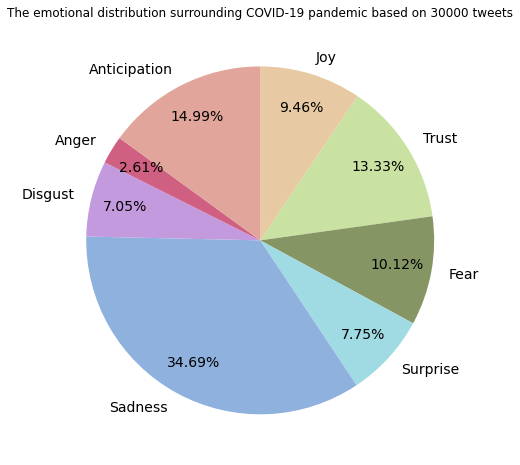

In [64]:
# Visualize the results in a pie chart
df1.iloc[len(df1)-1].plot.pie(figsize=(8, 8),colors=colors, fontsize=14, autopct='%1.2f%%',
                                   startangle=90, counterclock=False, pctdistance=0.8, label="",
                                   title = 'The emotional distribution surrounding COVID-19 pandemic based on 30000 tweets')